# Project: Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.the goal here is to clean, explore and study this dataset to understand it and extract question to answer by using this data, Let's see how this goes!
 #Q: Why did i choose this dataset?
     I've beeon obsessed with medical related data lately, and i am actually curious to know why patients show up to their            appointments or not!


In [1]:
#to list all the columns in this dataset:
#1. import the data set using the pandas function:
import pandas as pd
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
#2. list the columns now:
for index, col in enumerate(df.columns):
    print(index, col)
# so we have the listed below columns with their respictive indices, we have 14 columns as shown

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


*I noticed that the column names are not as consistent as i'd like them to be so i'll rename them in cleaning stage.               > since its more common and easier to work with lowercase, _ separated col. names*

## List of all columns and their significance:

| Column           | Significance                                                                                                      |
|------------------|-------------------------------------------------------------------------------------------------------------------|
| PatientId        | A unique identifier for each patient                                                                              |
| AppointmentID    | A unique identifier for each appointment made by the patients                                                     |         
| Gender           | The gender of the patient (male or female are the expected values that actually make sense)                       |
| ScheduledDay     | The day when the appointment was scheduled                                                                        |
| AppointmentDay   | The date and time of the actual appointment                                                                       |
| Age              | The age of the patient                                                                                            |
| Neighbourhood    | The neighborhood of the hospital (like a location)                                                                |
| Scholarship      | Indicates if the patient is enrolled in the Brazilian welfare program (0: No, 1: Yes)                             |
| Hipertension     | Indicates if the patient has hypertension (0: No, 1: Yes)                                                         |
| Diabetes         | Indicates if the patient has diabetes (0: No, 1: Yes)                                                             |
| Alcoholism       | Indicates if the patient has a history of alcoholism (0: No, 1: Yes) // addiction                                 |
| Handcap          | Indicates if the patient has any handicap (0: No, 1: Yes)                                                         |
| SMS_received     | Indicates if the patient received an SMS reminder for the appointment (0: No, 1: Yes)                             |
| No-show          | Indicates if the patient showed up for the appointment (No: Patient showed up, Yes: Patient did not show up)      |



## Questions:
1. what is common between patients who do not show up is  age factor in patients not showing up?
2. does gender play a role in people not showing up?

In [2]:
# Use this cell is to set up import statements for all of the packages that i need:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



In [3]:
# calling head and tail functions to get a glimpse on the data:
df.head()
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


we noticed the column names are formatted differently!

In [4]:
# Data is loaded into a dataframe called df.

#to see the size of the df (rows x columns)=(110527, 14)
print(f'number of records: {df.shape[0]}  and {df.shape[1]} features')

#to inspect and get to know the data types of my df:
df.dtypes

number of records: 110527  and 14 features


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#to get to know the dtypes, memory usage, columns and which are non-null and how many missing vals there is i'll apply info()
df.info()
# to get a feel of the data i'll check the statistics:
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


as we noticed that data types here are int64 for [Age Scholarship Hipertension Diabetes	Alcoholism Handcap] and object for a date column which can be enhanced in cleaning phase!

In [6]:
df.nunique()
#checking on number of unique values will help me in the next steps in cleaning!

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

needed to check on unique values which helps making the decision which features should be converted to category and so on.


### Data Cleaning

1. Change column names:

In [7]:
# as i said in Wrangling first i'd like to rename the columns since i'll maybe working on them here
labels=['patient_id', 'appointment_id','gender','scheduled_day', 'appointment_day', 'age','neighbourhood','scholarship','hypertension','diabetes', 'alcoholism','handicap', 'sms_received', 'no_show']
df.columns=labels
df
# so here i've changed the columns names and checked it.

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## this function calculates the percentage of missing,duplicated, unique values compared to total rows in the df:

In [8]:
def percentage_drop(df, value):
    
    rows = np.size(df, 0)
   
    return (value / rows) * 100

### I will check for any missing values :
-if its lower than 5% i drop the values.

In [9]:
# surprisingly i didn't notice any Nan or missing vlues in info() so i will check for sure:
df.isnull().sum()
#yes there are no missing values in any of the columns, Lucky me.

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

*There are no missing values here so there will be no need to use fillna() or dropna()*

### check the dataframe for any duplicates:

In [10]:
sum(df.duplicated())


0

*There are no duplicated values in this data frame, if there was a little percent of duplicate values say less then 2 to 4% i might've dropped them using drop_duplicates()*

### checking and changing data types:
-scheduled_day, appointment_day=> these 2 columns contain datetime values where in dtype showed they have object(in other words string) so i'll change them.

In [11]:
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])
df['scheduled_day'].dtype
df['appointment_day']=pd.to_datetime(df['appointment_day'])
df['appointment_day'].dtype

datetime64[ns, UTC]

### converting the columns with less unique values to category

In [12]:
# gender has only 2 values accourding to nunique above so i better convert it to category:
df['gender'] = df['gender'].astype('category')

In [13]:
# neighbourhood has 81 values
print (percentage_drop(df, 81)) #0.07328526061505333 can convert this is not much unique values!
df['neighbourhood'] = df['neighbourhood'].astype('category')

0.07328526061505333


 gender has only 2 values accourding to nunique above so i better convert it to category: has only 2 values accourding to nunique above so i better convert it to category:

In [14]:
df['no_show'] = df['no_show'].astype('category')

### converting int64  columns:
Scholarship, hypertension, diabetes, alcoholism, handicap, sms_received all of them contain 0,1 except for Handcap 1-4 so its safe to convert them to int8 for better memory usage.
i know the min and max values from the describe method above.

**before i convert i want to ensure if int8 is good enough**

In [15]:
np.iinfo('int8')

iinfo(min=-128, max=127, dtype=int8)

the int8 has min and max that can contain all of the valiues in these columns so convert:

In [16]:
int_columns=['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']
df[int_columns]=df[int_columns].astype('category')

__For appointment_id i want to chack if anything less than in64 would work__

In [17]:
appropriate_dtype = 'int64' if df['appointment_id'].max() > np.iinfo('int32').max else 'int32'
df['appointment_id']=df['appointment_id'].astype(appropriate_dtype)

max value for appointment id column fits in int32 so i will dtore it in int32 instead of int64 whaich saves memory

__Its time to handle age feature, hence i did notice -1 as the min value in it.__

In [18]:
invalid_ages =df['age'] <= 0
# to count the number of invalid values:
invalid_records=df[invalid_ages]
invalid_records.shape[0]

3540

In [19]:
# only  one value is below zero i can drop it
df = df[~invalid_ages]
df.shape[0]

106987

Ages in age feature range from 0 to 115 so there's no need to store them in int64 int8 is enough!

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       106987 non-null  float64            
 1   appointment_id   106987 non-null  int32              
 2   gender           106987 non-null  category           
 3   scheduled_day    106987 non-null  datetime64[ns, UTC]
 4   appointment_day  106987 non-null  datetime64[ns, UTC]
 5   age              106987 non-null  int64              
 6   neighbourhood    106987 non-null  category           
 7   scholarship      106987 non-null  category           
 8   hypertension     106987 non-null  category           
 9   diabetes         106987 non-null  category           
 10  alcoholism       106987 non-null  category           
 11  handicap         106987 non-null  category           
 12  sms_received     106987 non-null  category           
 13 

### Memory Usage:
as you can see before cleaning and handling the data types correctly the memory usage was at **11.8+ MB** now it dropped to more han half **5.4 MB**.

<a id='eda'></a>
## Exploratory Data Analysis


###  Question 1 : what is common between patients who do not show up is  age factor in patients not showing up?

I will show the age distribution to better understand how ages are spread:

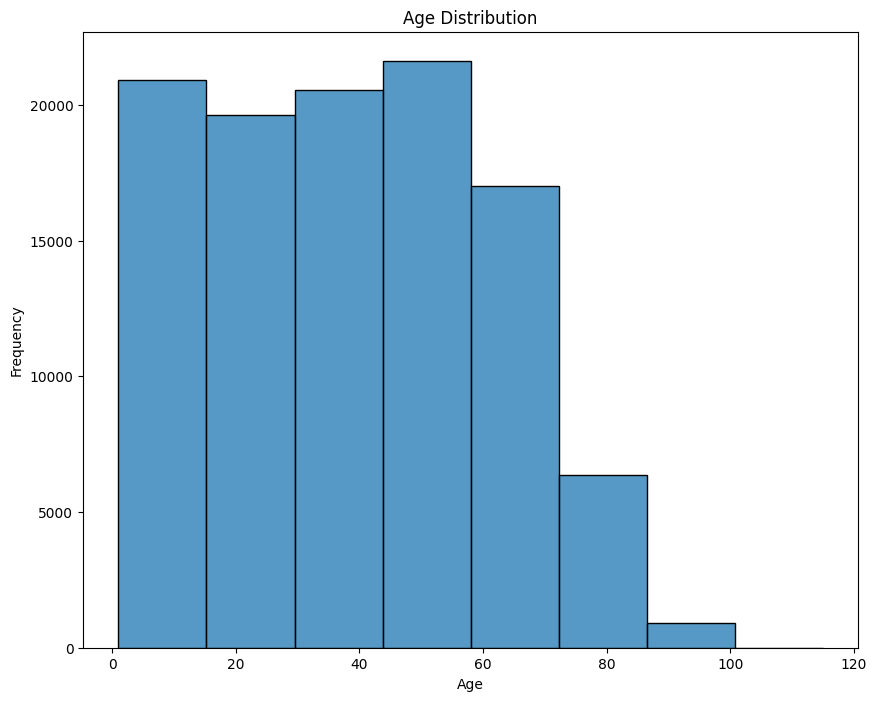

In [21]:
plt.figure(figsize=(10, 8))
sns.histplot(df['age'], bins=8)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

the ages appear to range from above 0 to 100 almost. were the most of data is taken on people aged from 40 - 55 approximately.

In [22]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

#### I will divide the dataframe into two parts one where patients show up and another where they dont.

In [23]:
df_yes=df[df['no_show']=='Yes']#people who didn't show up
df_no=df[df['no_show']=='No']#people who did show up

Find the mean values for each df:

In [24]:
mean_age_yes=df_yes.age.mean()


In [25]:
mean_age_no=df_no.age.mean()

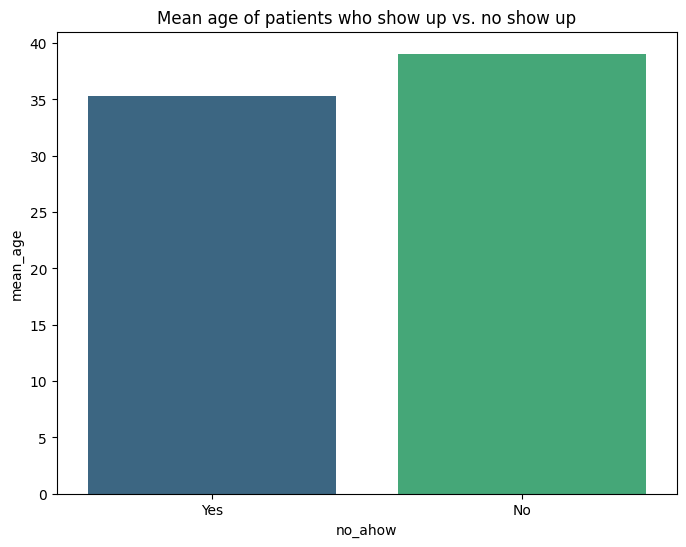

In [26]:
age_df = pd.DataFrame({
    'no_show': ['Yes', 'No'],
    'mean_age': [mean_age_yes, mean_age_no]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='no_show', y='mean_age', data=age_df, palette='viridis')
plt.title('Mean age of patients who show up vs. no show up')
plt.xlabel('no_ahow')
plt.ylabel('mean_age')
plt.show()

as the bar plot shows patients who are slightly older tend to show up to the appointments more than younger patients.
this might indicate that people/ patients who are  younger  tend to be more busy maybe or forget their appoiuntments
maybe their health status is not as critical as people who are a little older.

###  Question 2  : does gender play a role in people not showing up?

In [27]:
# Make a copy of the DataFrame 
df_copy = df.copy()
df_copy['no_show_num'] = df['no_show'].apply(lambda x: 1 if x == 'Yes' else 0)
df_copy['no_show_num'] = df_copy['no_show_num'].astype(int)


In [28]:
# i grouped the genders to find the mean value of the no_show_num column to see if it affects the no show rates:
gender_grouped = df_copy.groupby('gender')['no_show_num'].mean().reset_index()

In [29]:
#i will rename the columns to make it more understandable:
gender_grouped.columns = ['gender', 'no_show_rate']

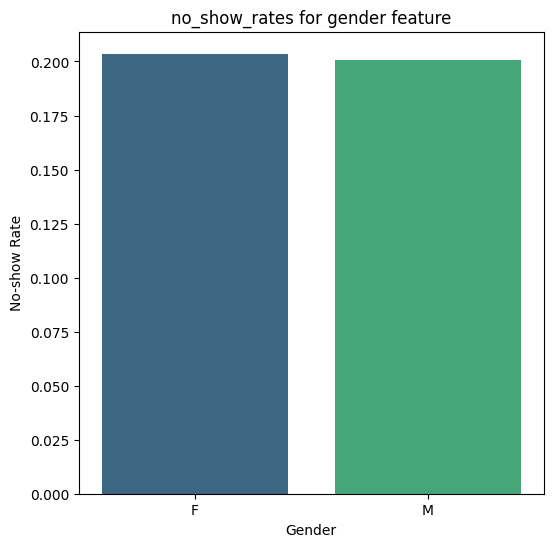

In [30]:
# Plot the bar chart
plt.figure(figsize=(6, 6))
sns.barplot(x='gender', y='no_show_rate', data=gender_grouped, palette='viridis')
plt.title('no_show_rates for gender feature')
plt.xlabel('Gender')
plt.ylabel('No-show Rate')
plt.show()

From the bar chart it is clear that females have higher no show rate than males, which might be due to different reasons, yet you can see their no much different, which leads to the need to do more research to unveil the reasons why patients won't show up.
it could be due to the wait time between the schedule date and the appointment date or other reasons.

<a id='conclusions'></a>
## Conclusions


we conclude that:

| Patients who are older tend to show up. 

| Patients who are males tend to show up more.

point out where additional research can be done or where additional information could be useful:
it could be due to the wait time between the schedule date and the appointment date. so we can delve into the wait time studying or on the appointment day there might be some event that pulled patients from coming.

#### Limitation:
most datatypes where categorical which limited my ability to visualize and extract information about the data.

## Submitting your Project 


In [31]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 405416 bytes to Investigate_a_Dataset.html
